# Анализ рынка продаж игр на различных платформах

Перед нами данные до 2016 года о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Изучим общую информацию о данных.

# Общая информация о данных.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import factorial
from scipy import stats as st
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


# Вывод
В нашем распоряжении датасет, содержащий 16715 строк. К счастью, ключевые показатели продаж не содержат пропусков.

Однако необходимо выяснить причины отсутствия данных в столбцах с названием игры, годом издания и рейтингом возрастной категории. Если оценок от критиков или пользователей может не быть по причине нежелания обращать внимания на такие игры, то название игры и год издания должен быть известен наверняка.

Перейдем к детальному изучению столбцов.

# Предобработка данных

Заменим названия столбцов, приведя к нижнему регистру.

In [5]:
df.columns = df.columns.str.lower()

In [6]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [7]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Перейдем к пропускам в отдельных столбцах.

Начнем с названий игр.

In [8]:
df.query('name != name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Несмотря на отсутствие названия игры и жанра, мы имеем данные о платформе и продажах в регионах. Эти данные понадобятся нам в дальнейшем для анализа "успешности" платформ. Поэтому нет необходимости удалять строки.


Посмотрим на значения в столбце с платформами. Убедимся, что в данных нет ничего необычного.

In [9]:
df['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

Данные по платформам радуют нас своим содержанием. Никаких замен производить не требуется.

Перейдем к столбцу с годом релиза игры. Здесь уже есть пропуски, посмотрим на них подробнее.

In [10]:
df.query('year_of_release != year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


269 строк не имеют нужной нам даты выпуска игры, при этом остальные столбцы в таких строках заполнены.

Отметим, что в названиях некоторых игр встречаются годы. Можно предположить, что это и есть год релиза. Но это неверно. Так игры Madden NFL 2004 и FIFA Soccer 2004 были выпущены в 2003, а игра wwe Smackdown vs. Raw 2006 - в 2005 году.

С этими строками мы также не будем совершать каких-то дополнительных действий, замен или удалений. В дальнейшем при необходимости сделаем срез данных без пропусков в этом столбце и будем работать с ним.


Перейдем к жанрам игр.


In [11]:
df['genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

In [12]:
df.query('genre != genre')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропуски в этом столбце похоже связаны с тем, что нам неизвестны названия игр. Поступим аналогично. Удалять эти строки нет необходимости, просто не будем их учитывать, если они будут влиять на анализ.

Посмотрим на столбцы с продажами.

In [13]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Видим, что в наших данных нет никаких необычных объемов продаж (например, отрицательных). Дополнительной обработки в столбцах не требуется.


Перейдем к столбцам с оценками от пользователей и критиков.

In [14]:
df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1         2
2.3       2
0.9       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Обратим внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Судя по всему здесь имеется в виду "To Be Determined". Собрано недостаточно данных для выставления пользовательской оценки игре. 
Для наших иследований примем эту аббревиатуру за NaN. 

In [15]:
df['user_score'] = df['user_score'].replace({'tbd':'NaN'})

Теперь мы сможем перевести данные в этом столбце из типа object в числовой для дальнейших вычислений.

In [16]:
df['user_score'].value_counts()

NaN    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
9.6       2
0.9       2
0.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [17]:
df['user_score'] = pd.to_numeric(df['user_score'],errors='coerce')

In [18]:
df.query('critic_score != critic_score')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [19]:
df['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

И для пользовательской оценки, и для оценки критиков, и для рвозрастного рейтинга нет возможности придумать такую замену пропусков, которая будет максимальна близка к истине. Тем более в будущем эти данные мы будем использовать для поиска взаимосвязей. Искусственные замены в таких больших количествах (более половины строк) скорее всего исказят результаты исследования и "уведут" нас от принятия правильных решений.

В связи с этим примем решение не удалять строки, а для анализа использовать срезы.

Напоследок проверим, нет ли в нашем датасете полных дублей строк.

In [20]:
df.duplicated().sum()

0

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Отметим, что несмотря на наличие временной характеристики в датасете менять тип столбца с числового на дату нет необходимости. 
Имеем дело только с годом. Проводить анализ и в таком виде не составит труда.

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец ['total_sales'].

In [22]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [23]:
df['total_sales'].describe()

count    16715.000000
mean         0.533396
std          1.548261
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64

# Вывод

Для сохранения хорошего объема выборки решено не избавлять от строк с пропусками, а использовать для дальнейшего анализа необходимые срезы датафрейма.

Большое число пропусков содержится в данных, касающихся рейтингов и оценок. Возможно, это связано с тем, что собранных отзывов и рецензий еще недостаточно для выставления оценки конкретной игре. В любом случае необходимо доработать сбор таких данных.

Суммарные продажи по игре сосредоточены в пределах от 0 до 82,54 млн. долларов. Перейдем к непосредственному анализу данных.

# Исследовательский анализ данных

### Анализ выпуска игр по годам

Посмотрим, сколько игр выпускалось в разные годы.

In [24]:
pd.qcut(df['year_of_release'], 10).value_counts()

(2007.0, 2009.0]      2853
(1979.999, 1999.0]    1976
(2004.0, 2006.0]      1945
(2011.0, 2014.0]      1778
(1999.0, 2002.0]      1661
(2002.0, 2004.0]      1537
(2009.0, 2010.0]      1255
(2006.0, 2007.0]      1197
(2010.0, 2011.0]      1136
(2014.0, 2016.0]      1108
Name: year_of_release, dtype: int64

Отметим, что в прошлом веке за 20 лет с 1980 по 1999 включительно игр было выпущено почти столько же, сколько всего за 2 года с 2005 по 2006.

Очевидно, что прогресс игровой индустрии в определенный момент совершил огромный толчок для выпуска тысячи тысяч игр в год. При этом сложно сранивать между собой игры из 1980 и игры из 2016.

Ограничимся данными по продажам игр, начиная с 2000го года.

In [25]:
df1 = df.query('year_of_release >= 2000')
df1['year_of_release'] = df1['year_of_release'].astype('int64')

## Анализ продаж игр по платформам

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами, построим распределение по годам и определим, за какой характерный срок появляются новые и исчезают старые платформы.

In [26]:
platform_sales = df1.pivot_table(
    index=['platform'], values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending = False).reset_index().head(10)

In [27]:
platform_sales

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.76
5,PS4,314.14
6,GBA,312.88
7,PSP,289.53
8,3DS,257.81
9,XB,251.57


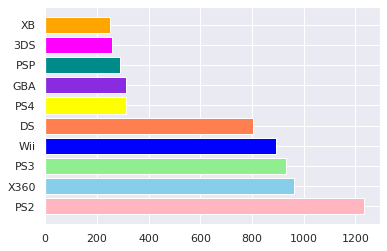

In [28]:
plt.barh(
    platform_sales['platform'], 
    platform_sales['total_sales'], 
    color=['lightpink', 'skyblue', 'lightgreen', 'blue', 'coral', 'yellow', 'blueviolet', 'darkcyan', 'magenta', 'orange'])
plt.show()

<div class="alert alert-warning">
<h2> Комментарий наставника</h2>

По данной таблице следует построить график. Он даст нам больше информации, чем таблица. 

</div>

**График построен**

<font color=green> Согласись, он дает нам больше информации о платформах. Как думаешь, почему первая пятерка так сильно выделяется?
    
---

Рассмотрим распределение продаж топ-5 платформ по годам.

In [29]:
def plot_by_platform(name):
    df_ds = df1.query('platform == @name')
    df_ds.groupby('year_of_release')['total_sales'].sum().plot.bar(
    x='year_of_release', y='total_sales', rot=0, figsize=(8,5))
    plt.title('Total_sales {}'.format(name))   

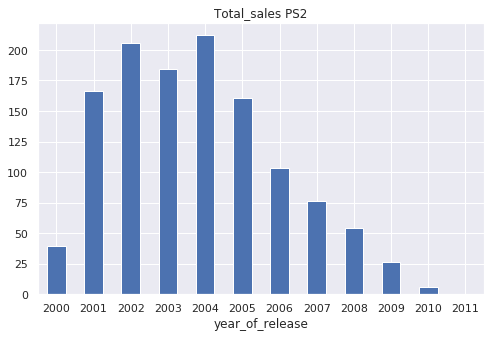

In [30]:
plot_by_platform('PS2')

Пик продаж для PS2 пришелся на 2004ый год. После этого продажи спадают до 0 к 2011ому.

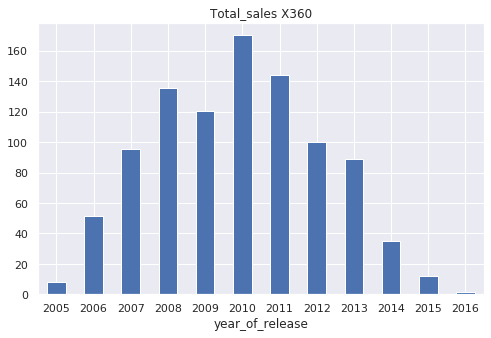

In [31]:
plot_by_platform('X360')

Пик продаж для X360  пришелся на 2010ый год. В отличие от PS2 здесь падение продаж не такое резкое. 

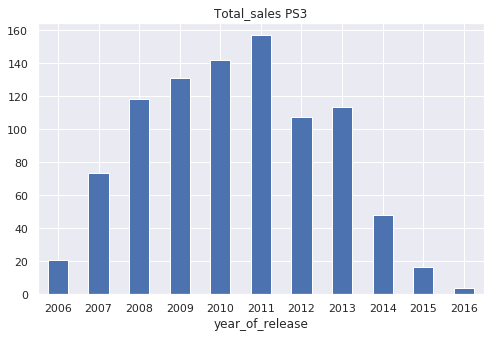

In [32]:
plot_by_platform('PS3')

Как видим из распределния, новую версию PS покупатели уже ждали после своей успешной предшественницы и долго не теряли к приставке интерес. В период с 2007 по 2013 продажи держатся на относительно высоком уровне. 

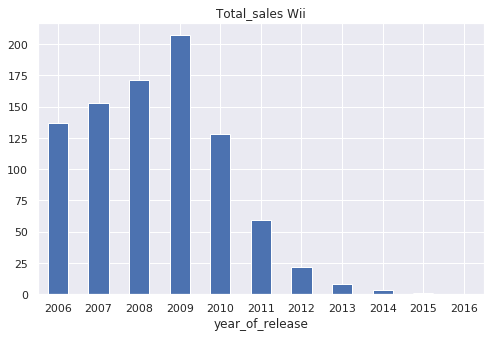

In [33]:
plot_by_platform('Wii')

В отличие от других платформа Wii стартовала сразу с отличным уровнем продаж. Однако после пикового года падение произошло сразу в два раза, затем еще в два и т.д.

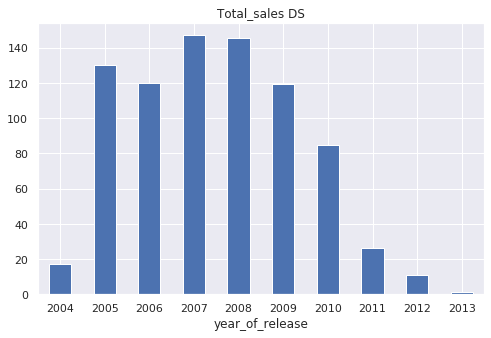

In [34]:
plot_by_platform('DS')

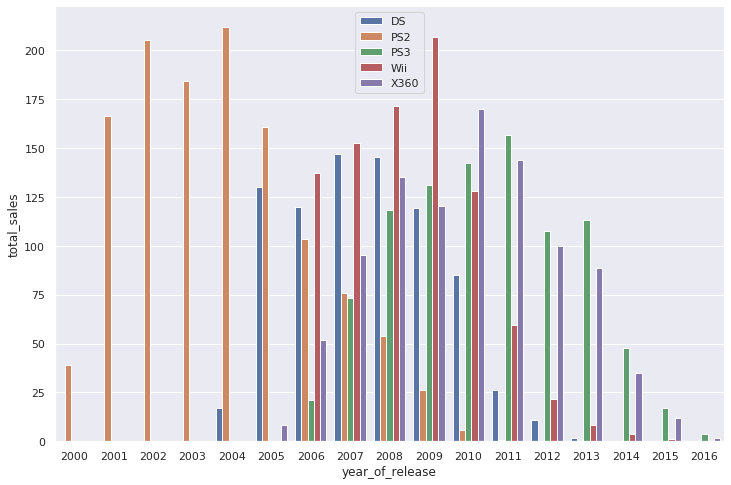

In [79]:
platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS']
example = df1.query("platform in @platforms").groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(data=example, x='year_of_release', y='total_sales', hue='platform')
plt.legend()

Видно, что пользователи холодно приняли появление игр на платформе DS, но уже спустя год продажи возросли почти в 7 раз и на протяжении пяти лет держались на высоком уровне.

Проанализировав разбросы продаж по годам, можно сделать вывод, что в среднем период жизни платформы, когда уровень продаж держится на хорошем уровне - 5 лет с первого роста до пикового значения.

Соответственно нам для анализа интересны данные с 2012го по 2016ый год включительно для прогноза на 2017ый год.

In [35]:
df2 = df1.query('2012 <= year_of_release <= 2016')

Определим, какие платформы лидируют по продажам и выберем несколько потенциально прибыльных платформ.

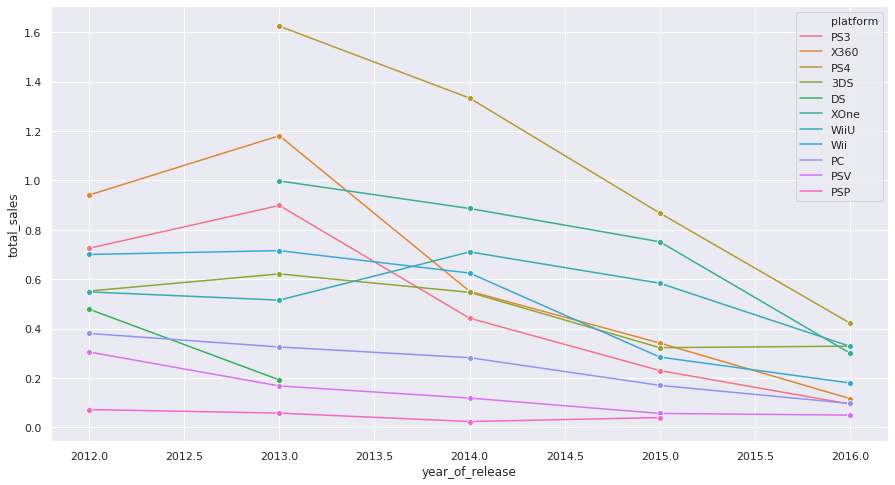

In [36]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(
    x="year_of_release", y="total_sales", hue="platform", linestyle='-', marker='o', ci=None, data=df2)

In [37]:
df2.pivot_table(index=['platform'], values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending = False)

,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


Лидирующей платформой по имеющимся данным является PS4, обогнавшая свою предшественницу почти на 30 миллионов долларов. Несмотря на большую сумму X360 нам следует ориентироваться на ХOne, так как именно с выходом этой приставки продажи игр на Х360 резко пошли на спад.

Также возьмем для ориентира платформы 3DS, WiiU и PC, представляющие других производителей. Составим список "хороших" платформ и сделаем срез данных по этому списку. 

In [38]:
good_platform = ['PS4', 'XOne', '3DS', 'WiiU', 'PC']

In [39]:
df3 = df2.query('platform in @good_platform')
df3.sample(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1176,Dead Rising 3,XOne,2013,Action,1.06,0.35,0.01,0.15,78.0,6.8,M,1.57
12575,Doraemon: Nobita no Uchuu Eiyuuki,3DS,2015,Action,0.00,0.00,0.06,0.00,NaN,NaN,NaN,0.06
8101,Daigasso! Band Brothers P,3DS,2013,Misc,0.00,0.00,0.18,0.00,NaN,NaN,NaN,0.18
13895,Hyperdimension Neptunia Victory II,PS4,2015,Role-Playing,0.00,0.00,0.04,0.00,NaN,NaN,NaN,0.04
7233,Dishonored 2,XOne,2016,Action,0.12,0.08,0.00,0.02,88.0,6.8,M,0.22
2214,Dragon Age: Inquisition,XOne,2014,Role-Playing,0.56,0.28,0.00,0.09,85.0,6.9,M,0.93
6325,LEGO The Hobbit,XOne,2014,Action,0.13,0.12,0.00,0.02,69.0,6.8,E10+,0.27
9780,Sword Art Online: Hollow Fragment,PS4,2015,Role-Playing,0.00,0.10,0.00,0.02,NaN,NaN,NaN,0.12
7009,Game & Wario,WiiU,2013,Misc,0.05,0.06,0.12,0.01,NaN,NaN,NaN,0.24
4686,LEGO Dimensions,XOne,2015,Action,0.22,0.15,0.00,0.04,80.0,6.9,E10+,0.41


Построим «ящики с усами» по глобальным продажам каждой игры и с разбивкой по платформам.

In [40]:
a = df3.groupby(['name', 'platform']).agg({'total_sales' : 'sum'}).reset_index()

[(0, 2)]

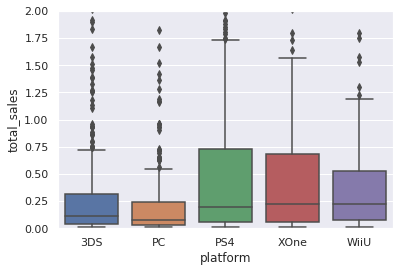

In [41]:
ax = sns.boxplot(x="platform", y="total_sales", data=a)
ax.set(ylim=(0, 2))

Как видим из графиков, три платформы PS4, XOne, WiiU значительно обгоняют 3DS и PC по продажам в целом. Большинство данных по трем лидерам сосредоточены в интервале до 1,75. По двум оставшимся - в пределах 0,75.

По средним значениям разница не так уж велика. Возможно, это связано с неполнотой данных за 2016ый год, которые теоретически могли бы увеличить средние продажи более "современных" приставок в виду бОльшей популярности.

### Анализ влияния отзывов пользователей и критиков

Посмотрим, как влияют на продажи внутри одной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

Для анализа опустим пустые значения в столбцах с оценками пользователей и критиков.

In [42]:
df4 = df3.query('user_score == user_score & critic_score == critic_score')
def score_platform(name):
    df_temp = df4.query('platform == @name')
    fig = plt.figure()
    fig.set_size_inches(10, 10)
    ax_1 = fig.add_subplot(2, 1, 1)
    ax_2 = fig.add_subplot(2, 1, 2)
    sns.regplot(x=df_temp["user_score"], y=df_temp["total_sales"], ax=ax_1).set(title = '{} platform'.format(name))
    sns.regplot(x=df_temp["critic_score"], y=df_temp["total_sales"], ax=ax_2)

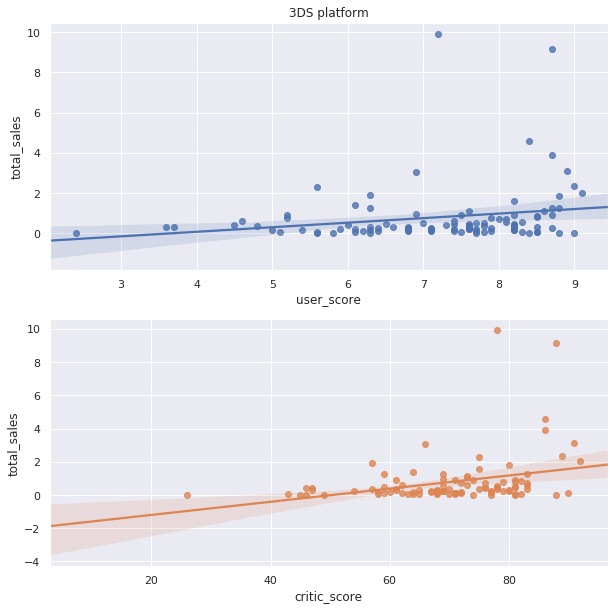

In [43]:
score_platform('3DS')

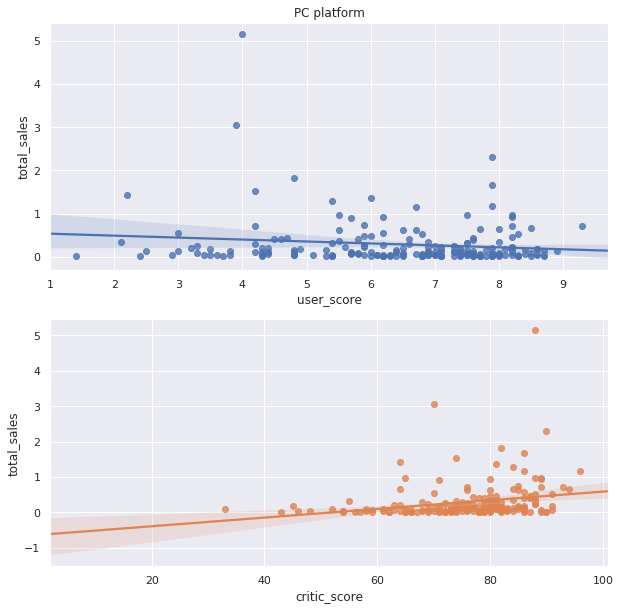

In [44]:
score_platform('PC')

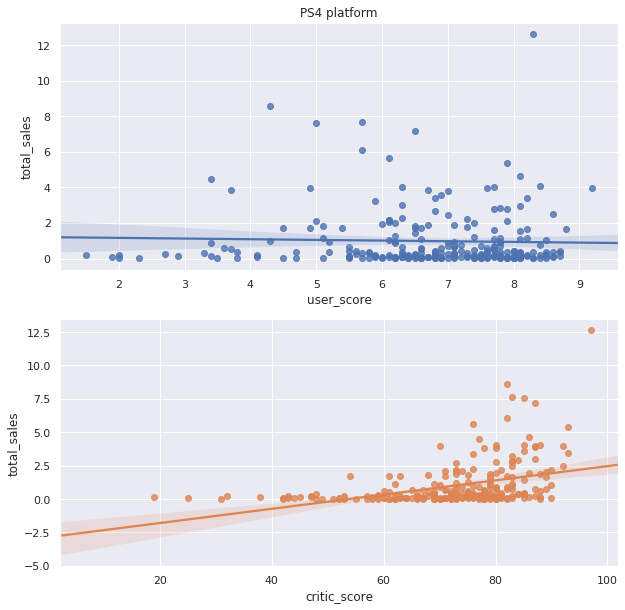

In [45]:
score_platform('PS4')

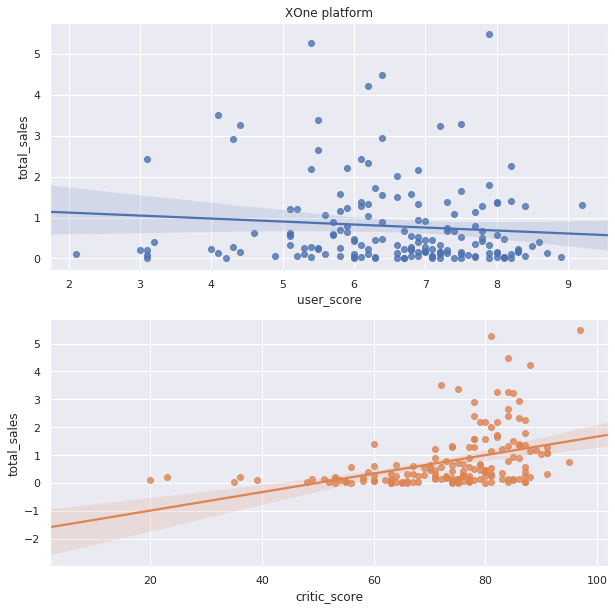

In [46]:
score_platform('XOne')

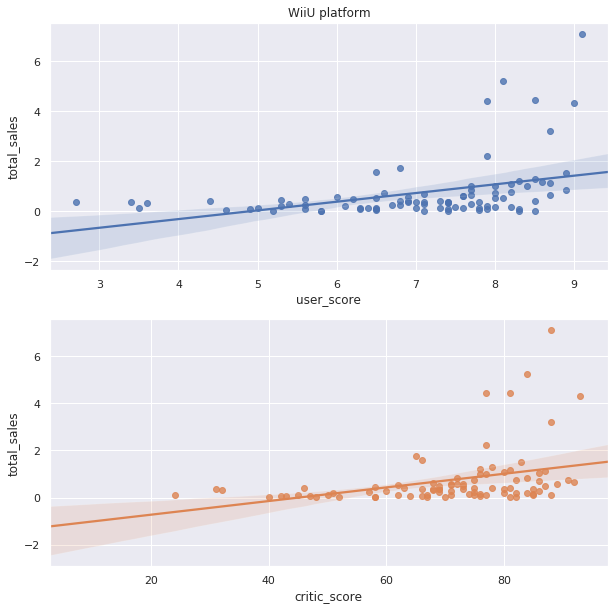

In [47]:
score_platform('WiiU')

Ознакомившись с разбросами данных, можно предполагать наличие сильной положительной связи между оценками пользователей и критиков и итоговыми продажами.

На всех диаграммах разброса точки (наблюдения) расположены достаточно близко к линии регрессии. Особенно хорошо это наблюдается в диаграммах оценок критиков. И это очевидный факт: при любой покупке человек склонен прислушиваться к чужому мнению, особенно если это мнение критика.

Определим коэффициенты корреляции и подтвердим наши выводы.

In [48]:
sale_critic_score = df4['total_sales'].corr(df4['critic_score'])
sale_user_score = df4['total_sales'].corr(df4['user_score'])

print ('Корреляция между продажами и оценками пользователей {:.4f}'.format(sale_user_score))
print ('Корреляция между продажами и оценками критиков {:.4f}'.format(sale_critic_score))

Корреляция между продажами и оценками пользователей 0.0388
Корреляция между продажами и оценками критиков 0.3157


Что и требовалось доказать.

1. Присутствует слабая положительная связь между оценками пользователей и суммой продаж. Коэффициент корреляции 0,0388.

2. Присутствует средняя положительная связь между оценками критиков и суммой продаж. Коэффициент корреляции 0,3157.

3. Влияние оценок критиков сильнее, чем влияние оценок пользователей.

Посмотрим, какие значения примут коэффициенты корреляции для платформ, не попавших в наши наблюдения.

In [49]:
df_bad_platform = df2.query('platform not in @good_platform & user_score == user_score & critic_score == critic_score')

In [50]:
sale_bad_critic_score = df_bad_platform['total_sales'].corr(df_bad_platform['critic_score'])
sale_bad_user_score = df_bad_platform['total_sales'].corr(df_bad_platform['user_score'])

print ('Корреляция между продажами и оценками пользователей {:.4f}'.format(sale_user_score))
print ('Корреляция между продажами и оценками критиков {:.4f}'.format(sale_critic_score))

Корреляция между продажами и оценками пользователей 0.0388
Корреляция между продажами и оценками критиков 0.3157


Для оставшихся платформ коэффициенты корреляции не изменились.

### Анализ продаж по жанрам

Посмотрим на общее распределение игр по жанрам и выделим самые прибыльные из них.

In [51]:
df3.pivot_table(index='genre', values='total_sales', aggfunc={'count', 'sum', 'mean'}).sort_values(by='mean', ascending=False)

,count,mean,sum
genre,,,
Shooter,132,1.282576,169.30
Platform,56,0.882143,49.40
Sports,121,0.768595,93.00
Role-Playing,178,0.760562,135.38
Fighting,42,0.617857,25.95
Simulation,54,0.579074,31.27
Racing,63,0.496984,31.31
Action,515,0.409922,211.11
Misc,107,0.357570,38.26


По количеству продаж и по суммарному доходу лидерами оказались игры в жанре Action. Однако "Стрелялки" принесли самый большой доход в среднем на одну игру. Самыми низкоприбыльными оказались игры в жанрах головоломки, стратегии и приключения.

# Вывод

Проведя исследовательский анализ данных мы составили примерную картину платформ и игр, которые интересны нам с точки зрения наибольших продаж.

Платформы регулярно меняют друг друга. В среднем с момента запуска платформа приносит хорошие уровни продаж в течение 5 лет, после чего нпроисходит спад и прекращение выпуска игр на устаревшие платформы. Поэтому нас интересуют данные по проадажам с 2012 по 2016 годы.

Для прогноза на 2017 год наибольший интерес представляют 5 платформ, охватывающие разных производителей и типы устройств: 'PS4', 'XOne', '3DS', 'WiiU', 'PC'.

Большое влияние на продажи оказывают оценки пользователей и критиков. Чем лучше оценки, тем лучше продажи.

Чаще всего в этот период покупались игры в жанре Action. Они и принесли наибольшую общую сумму. Однако при рассмотрении средний значений продаж на одну игру лучшим оказался жанр Shooter. 

# Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5).
- Самые популярные жанры (топ-5).
- Влияние рейтинга ESRB на продажи в отдельном регионе.

In [52]:
def region_sales(name):
    df_region = df2.pivot_table(index='platform', values=name, aggfunc={'sum'}).sort_values(
        by='sum', ascending=False)
    plot = df_region.head(5).plot.pie(x='platform', y='sum', figsize=(5, 5), autopct='%1.1f%%', legend=False)
    plt.title(name)
    display (df_region.head(5))    

,sum
platform,
X360,140.05
PS4,108.74
PS3,103.38
XOne,93.12
3DS,55.31


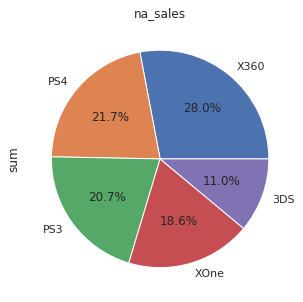

In [53]:
region_sales('na_sales')

,sum
platform,
PS4,141.09
PS3,106.86
X360,74.52
XOne,51.59
3DS,42.64


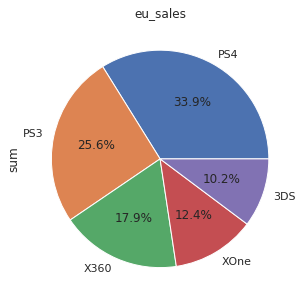

In [54]:
region_sales('eu_sales')

,sum
platform,
3DS,87.79
PS3,35.29
PSV,21.04
PS4,15.96
WiiU,13.01


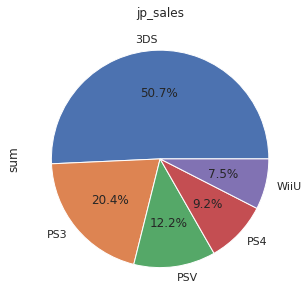

In [55]:
region_sales('jp_sales')

Так как XBox создана американской компанией Microsoft, то соответственно в этом регионе пользователи больше преданы этому бренду, маркетинговые компании проводятся гороздо активнее, чем на других континентах. Помимо этого служба для игр в онлайн XBox Live поддерживается в совсем ограниченном списке стран, в который не входит много стран Восточной Европы. По этим причинам приставки PS преобладают на рынке в Европе.  
В то же время японцы предпочитают портативные приставки, которые можно носить с собой. В Японии большинство квартир очень малы, поэтому пользователь не может позволить себе купить хороший телевизор и организовать место для игры на XBox или PS.
Именно поэтому наши суммарные продажи и показывают такие результаты по регионам.

In [56]:
def region_genre(name):
    df_region = df2.pivot_table(index='genre', values=name, aggfunc={'sum'}).sort_values(
        by='sum', ascending=False)
    plot = df_region.head(5).plot.pie(x='genre', y='sum', figsize=(5, 5), autopct='%1.1f%%', legend=False)
    plt.title(name)
    display (df_region.head(5))   

,sum
genre,
Action,177.84
Shooter,144.77
Sports,81.53
Role-Playing,64.00
Misc,38.19


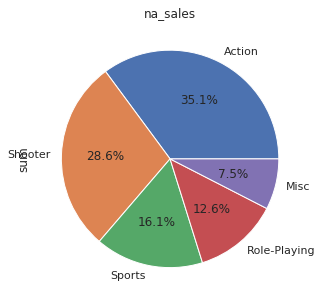

In [57]:
region_genre('na_sales')

,sum
genre,
Action,159.34
Shooter,113.47
Sports,69.09
Role-Playing,48.53
Racing,27.29


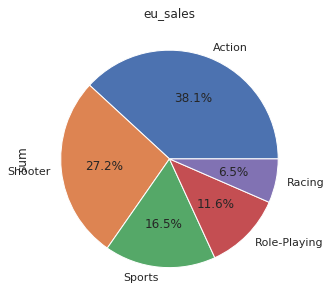

In [58]:
region_genre('eu_sales')

,sum
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44


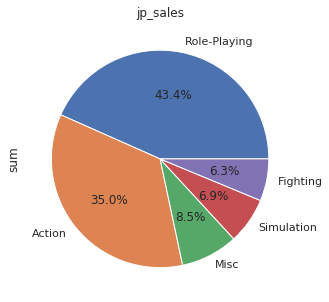

In [59]:
region_genre('jp_sales')

В Японии развит культ косплеев и нарядов, поэтому в этой стране лидируют игры в жанре RPG. Существует даже отдельный жанр JRPG.
Рынок же в Америке и Европе отдает предпочтение более классическим играм.


In [60]:
df2.pivot_table(index='rating', values=['na_sales','eu_sales','jp_sales'], aggfunc={'sum', 'mean'})

eu_sales          jp_sales         na_sales        
            mean     sum      mean    sum      mean     sum
rating                                                     
E       0.286152  113.03  0.071722  28.33  0.289544  114.37
E10+    0.180948   55.37  0.026765   8.19  0.247386   75.70
M       0.389478  193.96  0.042570  21.20  0.465000  231.57
T       0.128544   52.96  0.063155  26.02  0.160243   66.02

«E» («Everyone») — «Для всех»  
«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»  
«T» («Teen») — «Подросткам»  
«M» («Mature») — «Для взрослых»  

В Америке и Европе лучше всего продаются игры с возрастным рейтингом E и M. На японском рынке популярность игр различных возрастных категорий примерно одинакова за исключением игр от 10 лет.  
Однако рассматривая средний доход с одной игры в каждой возрастной категории вывод немного другой: Игры для взрослых популярнее на рынках Америки и Европы. В Японии выделяются игры для подростков, но незначительно.


# Вывод

Проанализировав географию рынка игр, можно составить картину "идеальной" игры для региона:

1. Для Америки игра должна быть выпущена для XBox, в жанре Action, Shooter, Sports или RPG с возрастным ограничением или для всех, или для взрослых.

2. Для Европы игра должна быть выпущена для PS, в жанре Action, Shooter, Sports или RPG с возрастным ограничением или для всех, или для взрослых.

3. Для Японии игра должна быть выпущена на портативных приставках, преимущество у жанра RPG. Возрастное ограничение для подростков или взрослых.

# Проверка гипотез о средних пользовательских рейтингах

Для исследования составим нужный нам срез без пропусков в столбце с оценками пользователей.

In [61]:
df_users = df2[df2['user_score'].notna()]

In [62]:
df_users

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16643,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,NaN,6.6,E,0.01
16652,Fast Racing Neo,WiiU,2016,Action,0.00,0.01,0.00,0.00,81.0,8.5,E,0.01
16654,Ben 10 Omniverse 2,X360,2013,Action,0.00,0.01,0.00,0.00,NaN,5.1,E10+,0.01
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,NaN,0.01


Проверим гипотезы о равенстве средних пользовательских рейтингов двух платформ.

In [63]:
xone_users = df_users.query('platform == "XOne"')['user_score']
pc_users = df_users.query('platform == "PC"')['user_score']

Text(0.5, 1.0, 'Распределения пользовательских рейтингов игр по жанрам Action и Sports')

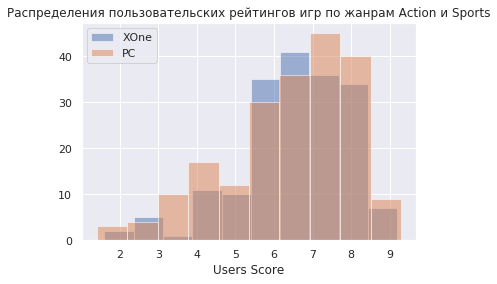

In [64]:
ax = xone_users.hist(alpha=0.5)
pc_users.hist(alpha=0.5)
ax.legend(["XOne", "PC"])
ax.set_xlabel('Users Score')
ax.set_title('Распределения пользовательских рейтингов игр по жанрам Action и Sports')

В данном случае мы имеем дело с двумя независимыми выборками количественных данных, подчиняющихся нормальному распределению. Поэтому для проверки гипотез будем использовать критерий Стьюдента.

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, используем метод scipy.stats.ttest_ind.  
Сформулируем гипотезы:

- Нулевая гипотеза H0: средние пользовательские рейтинги платформ Xbox One и PC  равны;

- Альтернативная гипотеза H1: cредние пользовательские рейтинги платформ Xbox One и PC не равны.

In [65]:
alpha = 0.05
results = st.ttest_ind(xone_users, pc_users)

print('p-значение: {:.5f}'.format(results.pvalue))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не удалось отвергнуть нулевую гипотезу")

p-значение: 0.55351
Не удалось отвергнуть нулевую гипотезу


Таким образом, по имеющимся данным не удалось отвергнуть гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC равны.

Проверим гипотезы о равенстве средних польховательских рейтингов двух жанров.

In [66]:
action_users = df_users.query('genre == "Action"')['user_score']
sports_users = df_users.query('genre == "Sports"')['user_score']

Text(0.5, 1.0, 'Распределния игр по жанрам Action и Sports')

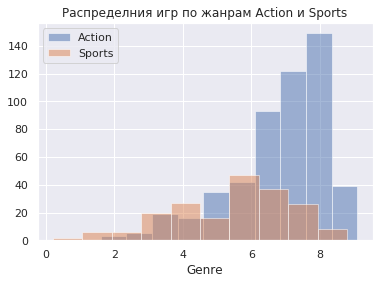

In [67]:
ax = action_users.hist(alpha=0.5)
sports_users.hist(alpha=0.5)
ax.legend(["Action", "Sports"])
ax.set_xlabel('Genre')
ax.set_title('Распределния игр по жанрам Action и Sports')

Аналогично в данном случае имеем дело с двумя независимыми выборками количественных данных, подчиняющихся нормальному распределению. Поэтому для проверки гипотез будем использовать критерий Стьюдента.

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, используем метод scipy.stats.ttest_ind.  
Сформулируем гипотезы:

- Нулевая гипотеза H0: средние пользовательские рейтинги жанров Action и Sports равны;

- Альтернативная гипотеза H1: cредние пользовательские рейтинги жанров Action и Sports не равны.

In [68]:
alpha = 0.05
results = st.ttest_ind(action_users, sports_users)

print('p-значение: {:.5f}'.format(results.pvalue))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.00000
Отвергаем нулевую гипотезу


Таким образом, по имеющимся данным отвергаем гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports равны.

 # Общий вывод

При выходе на рынок игр необходимо учитывать несколько основных факторов.

1. География. Рынок в каждом регионе зависит от присущих этой территории особых правил, привычек и удобств. Важно заранее понимать, на какой именно рынок мы выходим: узкий европейский или вселенский.

2. Платформа. В текущих условиях развития технологий платформы сменяют друг друга одна за одной. На место устаревших приходят более усовершенствонные модели. При запуске необходимо опираться на платформы, которые будут существовать хотя бы 5 лет.

3. Оценки пользователей и критиков. На имеющихся данных удалось подтвердить наличие связи между объемами продаж и оценками пользователей и критиков. При этом критики влияют на успешность игры сильнее. т.к. чаще всех покупатели делают выбор на основе авторитетных мнений.

4. Жанр. Нет смысла выпускать очередную игру-головоломку в то время как на рынке популярностью пользуются "стрелялки" и "бродилки". 

Основываясь на таких выводых можно приступать к созданию и продвижению продукта.

В целом необходимо получить больше данных за интересующий нас промежуток времени и по интересующим нас плафтормам. 